# Q1

In [108]:
#importing libs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
import pandas as pd
import seaborn as sns

In [110]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [111]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [112]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [113]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [115]:

x = df.drop('price', axis=1)
y = df['price']

In [116]:
x

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [117]:
x = pd.get_dummies(x, drop_first = True) #handing categorical features by one hot encoding

In [118]:
x

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [119]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [121]:
scaler = StandardScaler()

In [122]:
x_train_scaled = scaler.fit_transform(x_train) # normalizing features
x_test_scaled = scaler.transform(x_test)

In [123]:
LR = LinearRegression()
LR.fit(x_train_scaled, y_train)
y_pred = LR.predict(x_test_scaled)

<Axes: xlabel='price'>

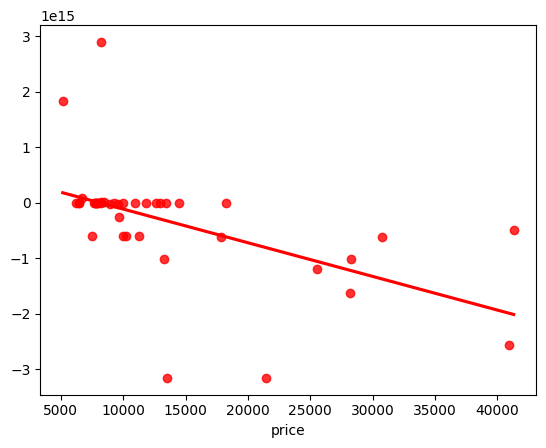

In [124]:
sns.regplot(x = y_test, y = y_pred, ci = None, color = 'red')

In [125]:
print(f"coeff : {LR.coef_}")
print("intercept :", LR.intercept_)

coeff : [ 1.35304716e+04  1.58555465e+03  5.77858318e+02 -2.96716887e+03
  1.77801612e+03 -9.94901258e+02  8.95643791e+03 -4.38722192e+02
 -1.09191489e+03 -1.85280180e+02 -3.02631218e+03 -7.85484968e+02
  1.22193394e+03  2.43494826e+03 -1.46901946e+03  2.45517632e+14
  2.63040295e+13  2.63040295e+13  1.73133287e+03  1.10296322e+14
  7.82316205e+13  7.82316205e+13  3.81034316e+14  7.82316205e+13
  2.98841316e+03  3.16116224e+03  4.30356186e+03 -6.05959558e+14
 -4.88613554e+14  2.84488416e+03 -3.71986489e+14 -2.05774307e+12
  2.15304912e+14 -1.84521578e+14  2.15941331e+14  2.35725254e+14
  7.82316205e+13  2.42245361e+14 -6.62668955e+13  1.00579102e+03
  9.06140625e+02  1.01759961e+03  6.71046875e+02  9.03907217e+13
  8.01468750e+02 -6.85390754e+13  1.03792188e+03  1.11731250e+03
  7.49742188e+02  8.41507812e+02  1.53742188e+03  8.41104492e+02
  9.54046875e+02  1.28070312e+03  5.31125000e+02  1.04893359e+03
  1.05608594e+03  1.23869141e+03  9.56859375e+02  9.14101562e+02
 -1.26832757e+13 

In [126]:
r2_score(y_test, y_pred)

-1.444987758029047e+22

In [127]:
mean_squared_error(y_test, y_pred)

np.float64(1.1407314374069481e+30)

In [128]:
y_train_pred = LR.predict(x_train_scaled)

In [129]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training plot')

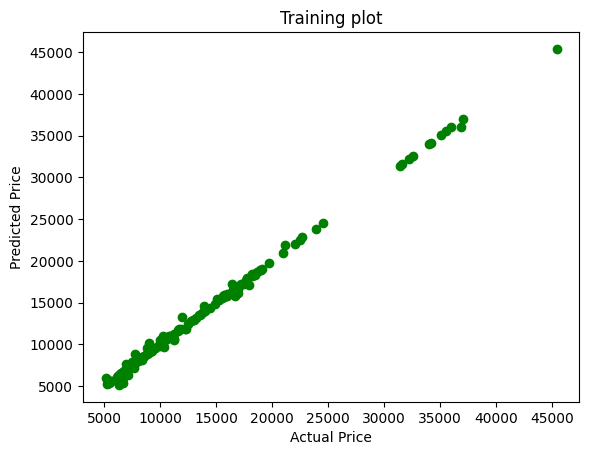

In [130]:
plt.scatter(y_train, y_train_pred, color = 'green')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training plot')

Text(0.5, 1.0, 'Testing plot')

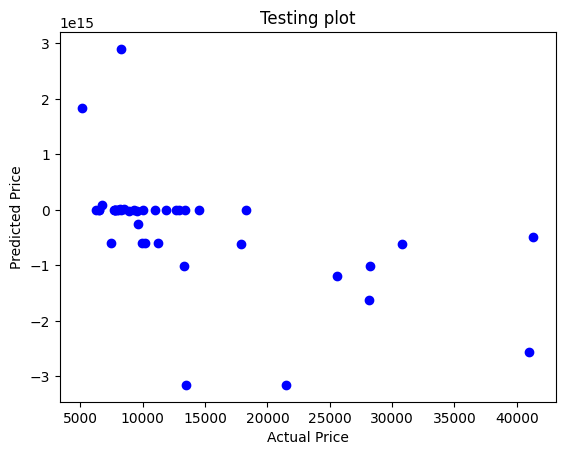

In [131]:
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing plot')

# Q2

In [132]:
df = pd.read_csv('electricity_bill_dataset.csv')

In [133]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [134]:
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [135]:
x = pd.get_dummies(df.drop(columns = 'ElectricityBill', axis=1), drop_first = True)

In [136]:
x

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,City_Chennai,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
0,16,23.0,2.0,6.0,1.0,0,10,384,8.4,False,...,False,False,False,False,False,True,False,False,False,False
1,19,22.0,2.0,3.0,1.0,0,5,488,7.8,False,...,False,False,False,False,False,False,False,False,False,False
2,7,20.0,2.0,6.0,7.0,0,7,416,7.7,False,...,False,False,False,False,False,False,False,False,False,False
3,7,22.0,3.0,21.0,1.0,0,6,475,9.2,False,...,False,False,False,False,False,False,False,False,False,False
4,11,23.0,2.0,11.0,1.0,0,2,457,9.2,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,764,7.9,False,...,False,False,False,False,False,False,False,False,False,False
45341,23,23.0,2.0,6.0,12.0,0,2,572,8.5,False,...,False,False,False,False,False,False,False,False,False,False
45342,22,22.0,2.0,20.0,1.0,0,1,609,8.5,False,...,False,False,False,False,False,False,False,False,False,False
45343,8,21.0,2.0,22.0,7.0,0,12,748,7.4,False,...,False,False,False,False,False,False,False,False,True,False


In [137]:
y = df['ElectricityBill']

In [138]:
y

0        3225.6
1        3806.4
2        3203.2
3        4370.0
4        4204.4
          ...  
45340    6035.6
45341    4862.0
45342    5176.5
45343    5535.2
45344    3544.1
Name: ElectricityBill, Length: 45345, dtype: float64

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [140]:
scaler2 = StandardScaler()
x_train_scaled = scaler2.fit_transform(x_train)
x_test_scaled = scaler2.transform(x_test)

In [141]:
LR2 = LinearRegression()
LR2.fit(x_train_scaled, y_train)
y_pred = LR2.predict(x_test_scaled)

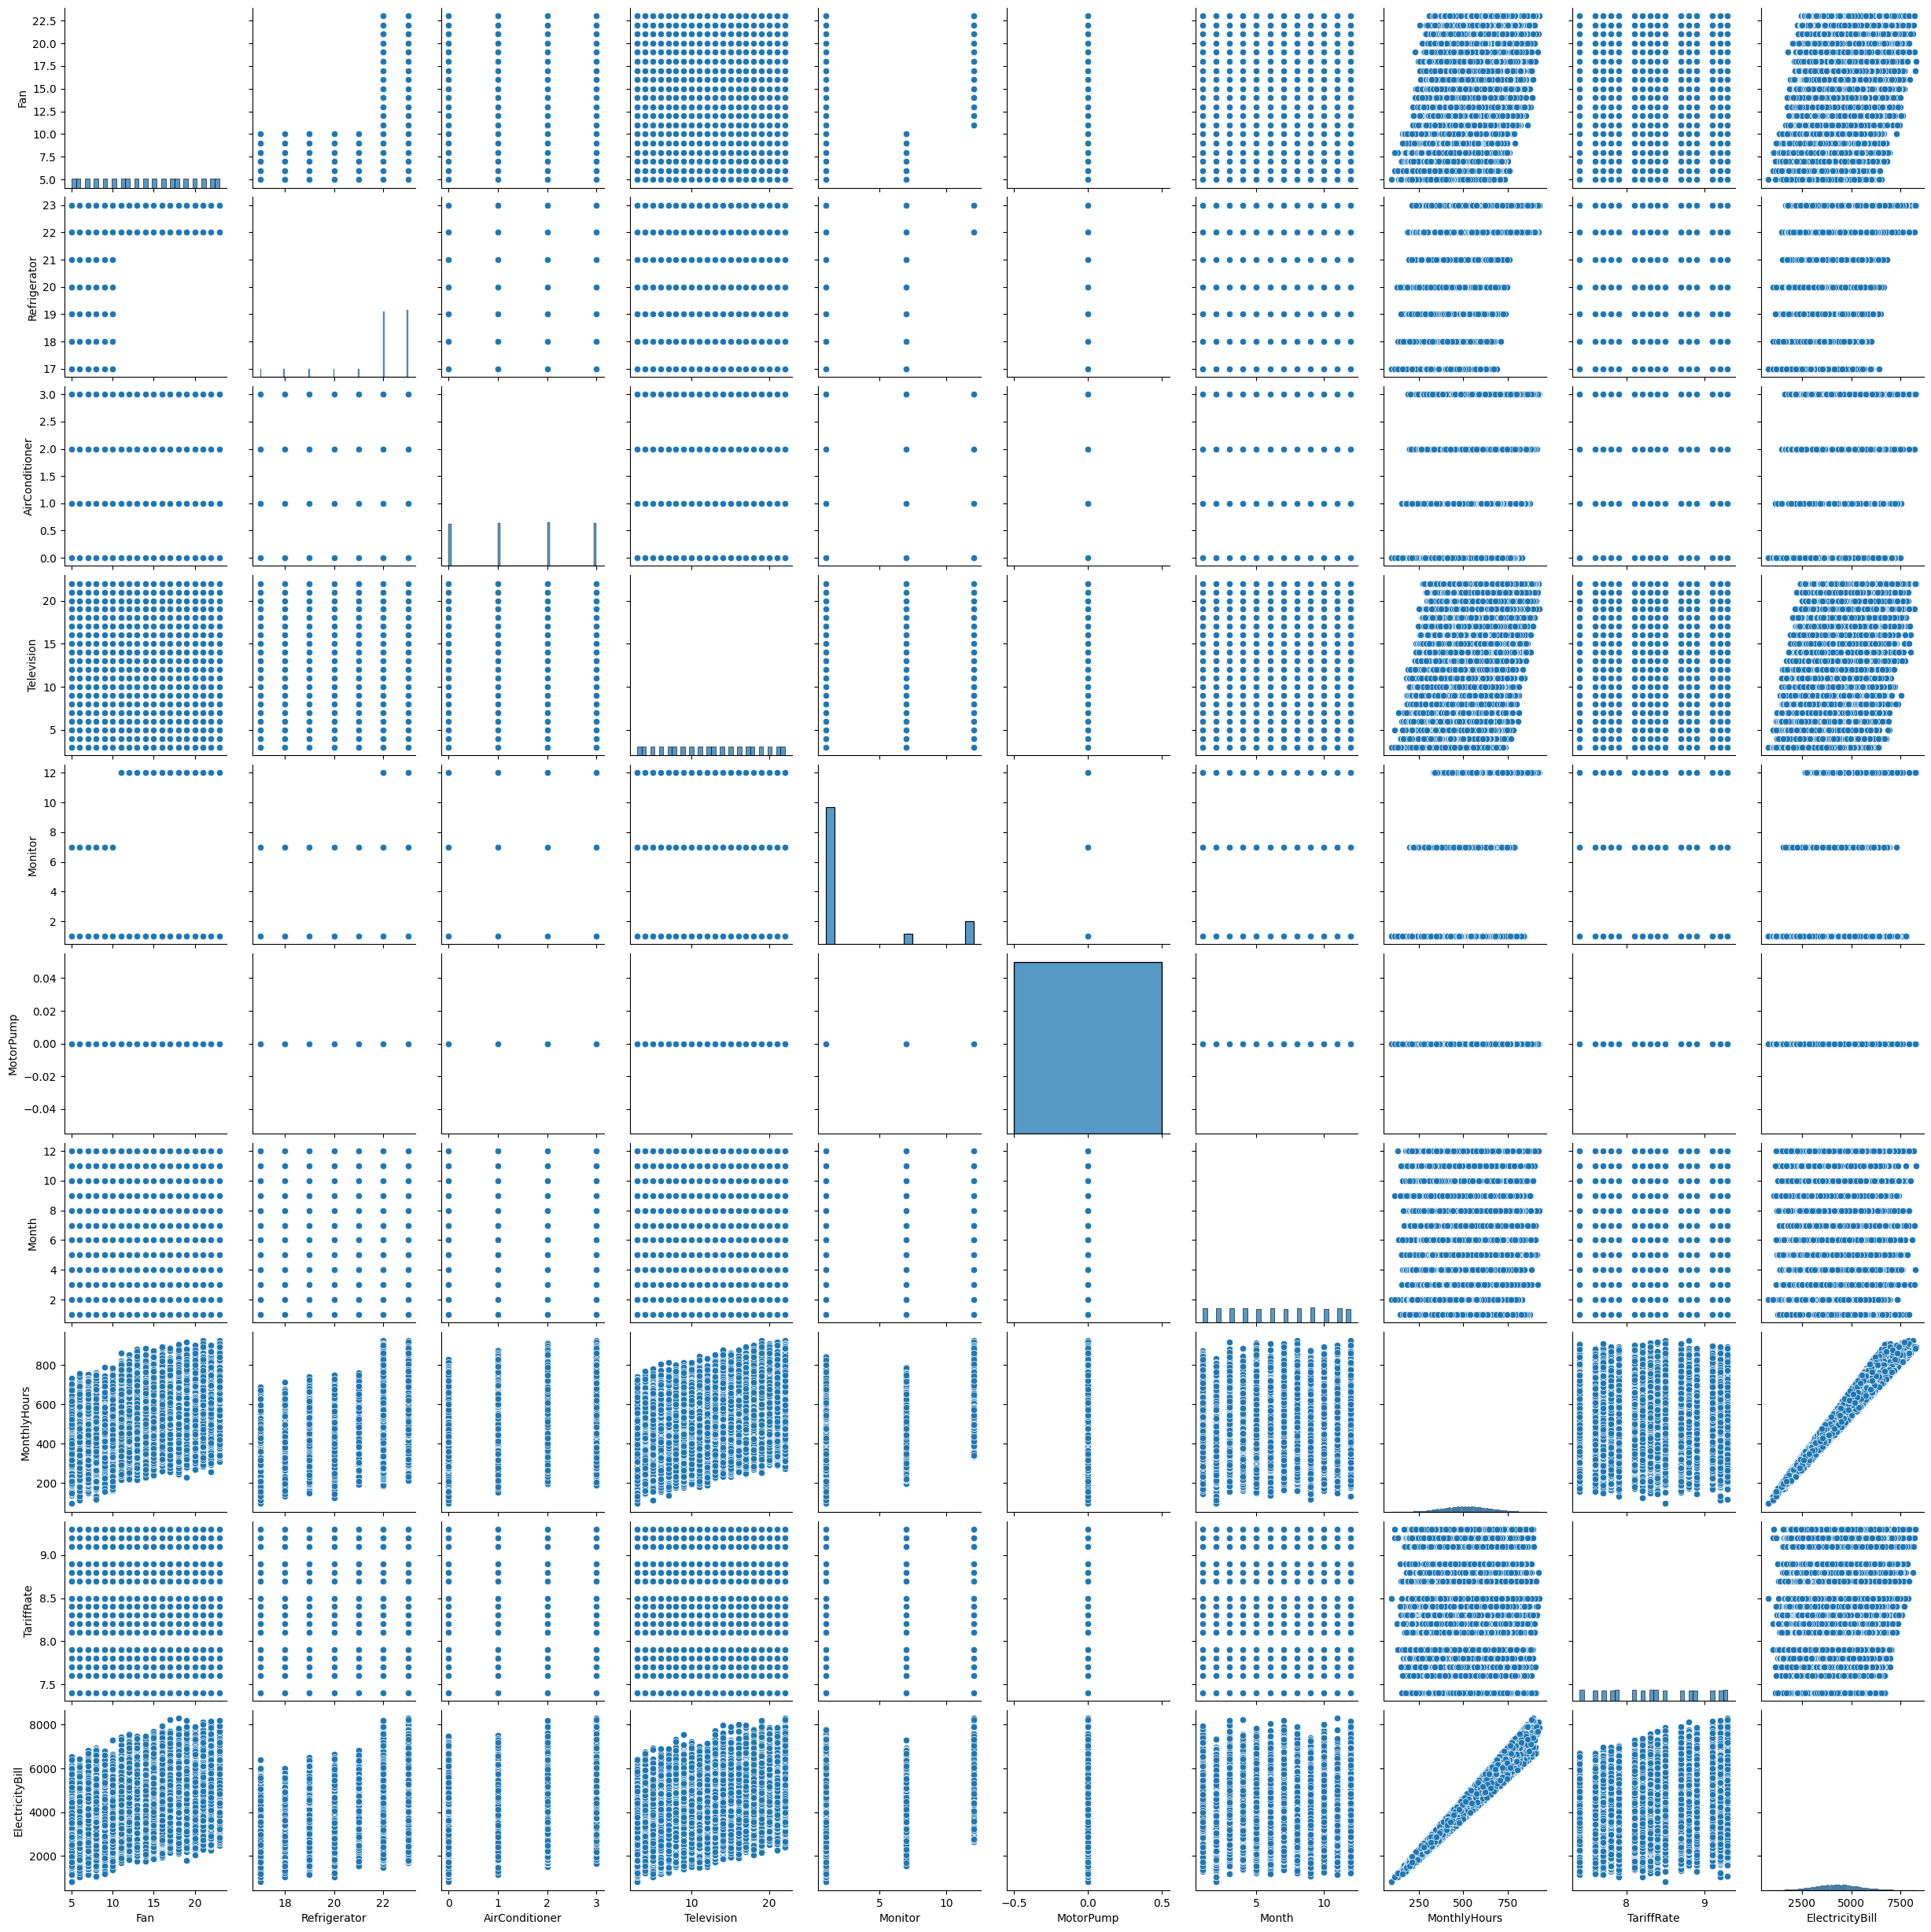

In [142]:
import matplotlib.pyplot as plt
sns.pairplot(data=df.select_dtypes(include='number'))
plt.show()

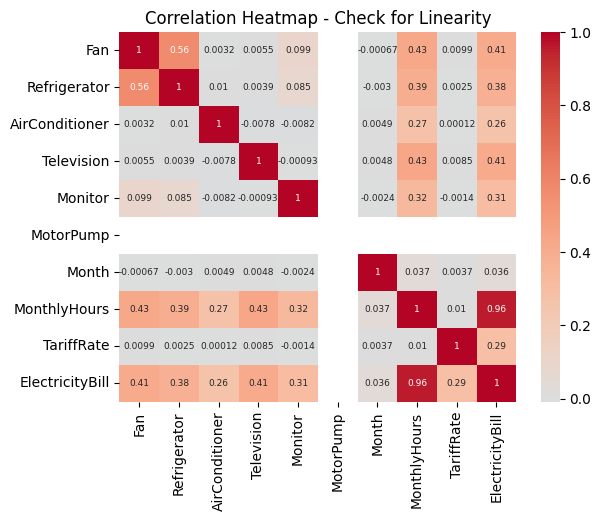

<Figure size 4000x1000 with 0 Axes>

In [153]:
# Add correlation heatmap
import seaborn as sns
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', center=0, annot_kws={"size": 6.5})
plt.title('Correlation Heatmap - Check for Linearity')
plt.figure(figsize=(40, 10))
plt.show()

In [157]:
residuals = y_test - y_pred

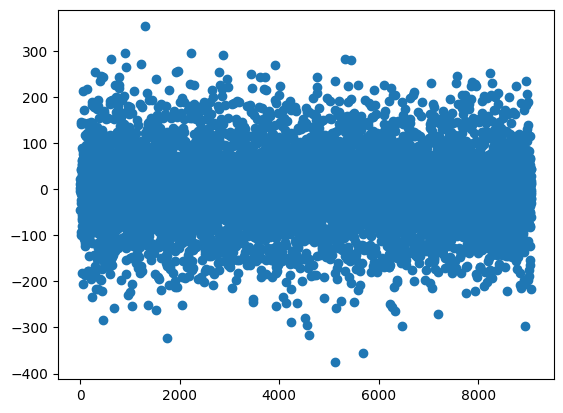

In [160]:
plt.scatter(range(len(residuals)),residuals, marker = 'o')